In [20]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [21]:
iris = datasets.load_iris()

In [22]:
X = iris.data
y = iris.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [26]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history=model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=4, validation_split=0.1)

Epoch 1/100
27/27 [==============================] - 1s 14ms/step - loss: 0.9356 - accuracy: 0.5926 - val_loss: 0.8169 - val_accuracy: 0.9167
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7963 - val_loss: 0.6571 - val_accuracy: 0.8333
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8148 - val_loss: 0.5371 - val_accuracy: 0.8333
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8333 - val_loss: 0.4564 - val_accuracy: 0.9167
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8241 - val_loss: 0.4112 - val_accuracy: 0.9167
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8704 - val_loss: 0.3727 - val_accuracy: 0.9167
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8889 - val_loss: 0.3395 - val_accuracy: 0.9167
Epoch 8/100


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [30]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 103ms/step - loss: 0.0081 - accuracy: 1.0000
Test Loss: 0.0081
Test Accuracy: 1.0000


Text(0.5, 1.0, 'Training Accuracy')

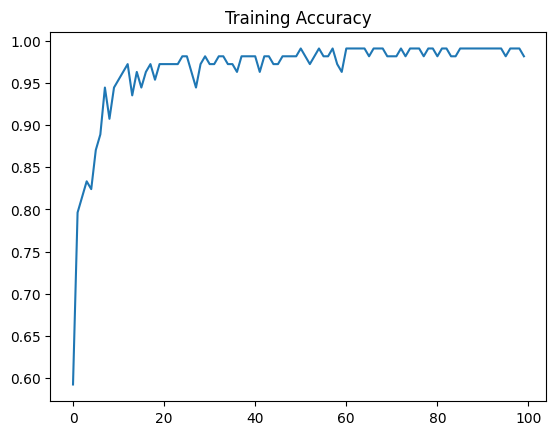

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')

Text(0.5, 1.0, ' Validation Accuracy')

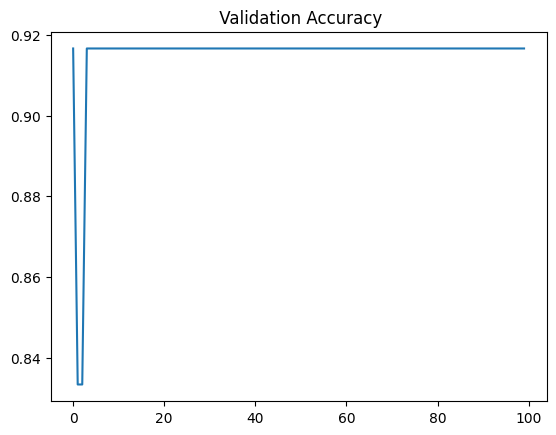

In [34]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(' Validation Accuracy')